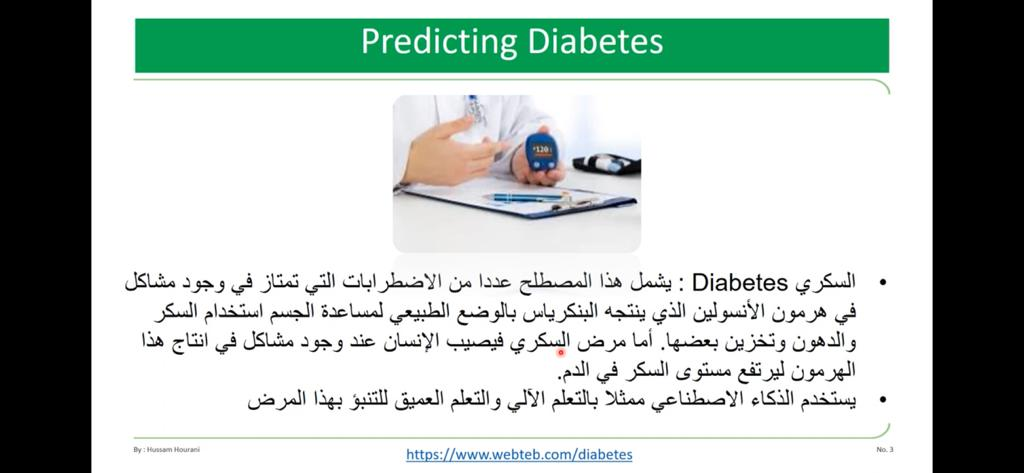

# Dataset

diabetes.csv in link:
https://www.kaggle.com/uciml/pima-indians-diabetes-database


• Pregnancies: Number of times pregnant            
• Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test                
• Blood Pressure: Diastolic blood pressure (mm Hg)               
• SkinThickness: Triceps skin fold thickness (mm)                
• Insulin:2-Hour serum insulin (mu U/ml)               
• BMI:Body mass index (weight in kg/(height in m)^2)                  
• DiabetesPedigreeFunction Diabetes pedigree function                 
• Age: Age (years)              
• Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0                     

# Predicting Diabetes using RandomForestClassifier - Project 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import numpy as np 
import pandas as pd
dataset = pd.read_csv('diabetes.csv')
print (dataset.info ())
print (dataset.isnull ().sum())
X = dataset.iloc [:,: -1]
y = dataset.iloc[:, [-1]]
X_train, X_test, y_train, _test = train_test_split(X, y, test_size = .2, random_state = 0)
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit (X_train, y_train)
y_pred = classifier.predict (X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(classification_report(y_test, y_pred))
print ("The accuracy is :", classifier.score(X_test, y_test)) 
import scikitplot as skplt 
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False) 
plt.show()
print ( "The new predection is:", classifier.predict(np.array([ [6,142,72,45,0,38.6,0.627,50]]))) 
print ( "The new predection is:", classifier.predict (np.array([[1, 109, 30, 38, 83,53.3, 0.193, 33]])))

# Predict diabetes using Deep Learning - Project 2

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense
dataset = pd.read_ csv('diabetes.csv')
dataframeInNumpy = dataset.values #take the datarame to a numpy typed nd-array
inputVariables = dataframeInNumpy [:,:8]
outputVariables = dataframeInNumpy[:, 8:]
model = Sequential ()
model. add(Dense(15, input_dim=8, kernel_initializer='random_uniform', activation='relu')) 
model. add(Dense(7, input_dim=8, kernel_initializer='random_uniform', activation='relu')) 
model. add(Dense(1, input_dim=8, kernel_initializer='random_uniform', activation='sigmoid'))
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit (inputVariables, outputVariables, epochs=150, batch_size=10)
scores = model.evaluate (inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model.metrics_names [1], scores [1]*100))
print ( "The new predection is:", model.predict (np.array ( [ [6,142, 72,45,0, 38.6,0.627,50]]))) 
print ( "The new predection is:" model.predict (np.array ([ [1, 109, 30, 38,83,53.3,0.193,33]])))

# Predict diabetes using Deep Learning - Project 3

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
dataset = pd. read_csv('diabetes.csv')
dataframeInNumpy = dataset.values
inputVariables = dataframeInNumpy[:, :8]
outputVariables = dataframeInNumpy[:, 8:]
X_train, ×_test, y_train, y_test = train_test_split(inputVariables, outputVariables, test_size=0.2, random_state=42)
model = Sequential ()
model.add(Dense (500, input_dim=8, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model. add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit (x_train,y_train, epochs=1000, batch_size=70, validation_data=(_test, y_test))
scores = model.evaluate (inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model.metrics_names [1], scores [1]*100)) 
print ( "The new predection is:", model.predict (np.array([ [6, 142,72,45,0, 38.6,0.627,50]]))) 
print ("The new predection is:" , model.predict (np. array ([ [1, 109, 30, 38,83,53.3,0.193,33]])))

# Predict diabetes using Deep Learning - Project 4

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint
seed = 42
np.random.seed(seed)
pdata = pd.read_csv('diabetes.csv')
# let's remove the 0-entries for these fields
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
def check_zero_entries (data, fields):
    '''List number of e-entries in each of the given fields'''
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))
check_zero_entries (pdata, zero_fields)
# First - split into Train/Test
from sklearn.model_selection import train_test_split
features = list (pdata.columns.values)
features. remove ('Outcome')
print(features)
X = pdata [features]
y = pdata['Outcome']

Output:
    
field Glucose: num 0-entries: 5            
field BloodPressure: num 0-entries: 35              
field Skin Thickness: num 0-entries: 227               
field Insulin: num 0-entries: 374               
field BMI: num 0-entries: 11                 
        
['Pregnancies', 'Glucose', 'BloodPressure', 'Skin Thickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
X_train, X_test, y_train, _test = train_test_split(X, y, test_size=0.25, random_state=0)
# lets fix the 0-entry for a field in the dataset with its mean value
def impute_zero_field(data, field):
    nonzero_vals = data. loc[data[field] != 0, field]
    avg = np.sum (nonzero_vals) / len (nonzero_vals)
    k = len (data.loc[ data[field] == 0, field]) # num of 0-entries
    data.loc[ data[field] == 0, field ] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))
# Fix it for Train dataset
for field in zero_fields:
    impute_zero_field(X_train, field)    
# double check for the Train dataset
check_zero_entries (X_train, zero_fields)
# Fix for Test dataset
for field in zero_fields:
    impute_zero_field(X_test, field)
# double check for the Test dataset
check_zero entries (X test, zero_fields)

Output:
    
Field: Glucose; fixed 4 entries with value: 122.003                  
Field: BloodPressure; fixed 25 entries with value: 72.846                 
Field: SkinThickness; fixed 163 entries with value: 29.465              
Field: Insulin; fixed 270 entries with value: 158.464                 
Field: BMI; fixed 8 entries with value: 32.663              

field Glucose: num 0-entries: 0                
field BloodPressure: num 0-entries: 0               
field SkinThickness: num 0-entries: 0              
field Insulin: num 0-entries: 0            
field BMI: num 0-entries: 0         

In [ ]:
check_zero_entries (X_test, zero_fields)
# Ensure that fieldnames aren't included
X_train = X_train. values
y_train =y_train.values
X_test = X_test. values
y_test = y_test.values
NB EPOCHS = 1000 # num of epochs to test for
BATCH SIZE = 16
## Create our model
model = Sequential ()
# Ist layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, init='uniform', activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activations'sigmoid' ))
# Compile the model
model.compile (loss='binary_crossentropy', optimizer='adam' metrics= ['accuracy'])
# since we are predicting 0/1


# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), nb_epoch=NB_EPOCHS, batch_size=BATCH_SIZE, 
                    callbacks=callbacks_list, verbose=0)
# Model accuracy
pit.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
pit.title( 'Model Accuracy')
pit.ylabel('accuracy')
pit.xlabel ('epoch')
pit. legend(['train', 'test']) 
plt.show()


# Model Losss
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title( 'Model Loss')
plt.ylabel ('loss') plt.xlabel('epoch')
plt. legend(['train', 'test']) 
plt.show()

scores = model. evaluate (X_train, y_train)
print ("\n%s: %.2f%%" % (model.metrics_names [1], scores [1]*100))

# References:

https://www.webteb.com/diabetes
 
https://www.kaggle.com/alhassanabdelglil/predicting-the-diabetes

https://medium.com/@ddevinda/hands-on-neural-networks-with-diabetes-prediction-using-keras-9510d3c35a1

https://github.com/vidit0210/PIMA-Diabetes-DNN/blob/master/Diabetes.ipynb

https://www.kaggle.com/atulnet/pima-diabetes-keras-implementation



# Reference projects - Predict diabetes:

https://www.kaggle.com/paultimothymooney/predict-diabetes-with-python-starter-kernel      

https://www.kaggle.com/arjunshenoymec/diabetes-prediction-using-ml

https://www.kaggle.com/kredy10/simple-neural-network-for-diabetes-prediction

https://www.kaggle.com/dbsnail/diabetes-prediction-over-0-86-accuracy

https://www.kaggle.com/paultimothymooney/predict-diabetes-from-medical-records

https://www.kaggle.com/what0919/diabetes-prediction

https://www.kaggle.com/itsbitan/diabetes-prediction

https://www.kaggle.com/fakharabbasmehar/prediction-of-pima-diabetes-with-machine-learning